## Preparation

In [1]:
import sys
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = "/content/drive/My Drive/project/"
sys.path.append(path + "URP")
sys.path.append(path + "URP/learning")
sys.path.append(path + "URP/data")
sys.path.append(path + "URP/models")

In [ ]:
'''Test created models here'''

### for pc
'''
sys.path.append("..")
sys.path.append("../data")
sys.path.append("../models")
'''

from data import get_dataset, dummy_clusters, dummy_half_doughnuts
from data_utils import ForgetDataset
from models_utils import *
import models
import torch.nn as nn
from learn import *
from utils import set_seed

In [ ]:
set_seed()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

##CNN & CIFAR10

In [ ]:
cnn = {"filters_percentage": 1, "n_channels":3,"num_classes": 10, "dropout": True, "batch_norm": True}
cnn_model = get_model("cnn", **cnn)
print(cnn_model.__class__.__name__)

CNN


In [ ]:
cifar10_train, cifar10_val, cifar10_test = get_dataset("cifar10", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /root/data/cifar-10-python.tar.gz to /root/data
Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32


In [ ]:
torch.__version__

'1.10.0+cu111'

In [ ]:
train(model=cnn_model, loss='ce', optimizer='adam', scheduler="steplr", epochs=70, device=device, dataset='cifar10', lossfn=None, train_loader=cifar10_train,
      val_loader=cifar10_val, weight_decay=0.0, lr=0.001, momentum=0, patience=10, step_size=40, gamma=0.1, min_delta=-1.0)

SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]


RuntimeError: ignored

Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in CNN_training]
[0] train metrics:{"loss": 1.5898408889770508, "error": 0.625}
[0] test metrics:{"loss": 1.7925333976745605, "error": 0.5625}
Epoch number: 0 
Epoch Time: 9.49 sec
[1] train metrics:{"loss": 1.5614700317382812, "error": 0.625}
[1] test metrics:{"loss": 1.190283179283142, "error": 0.375}
Epoch number: 1 
Epoch Time: 9.45 sec
[2] train metrics:{"loss": 1.1055727005004883, "error": 0.5625}
[2] test metrics:{"loss": 0.9970486164093018, "error": 0.25}
Epoch number: 2 
Epoch Time: 9.32 sec
[3] train metrics:{"loss": 1.4400930404663086, "error": 0.375}
[3] test metrics:{"loss": 1.2227706909179688, "error": 0.375}
Epoch number: 3 
Epoch Time: 9.4 sec
[4] train metrics:{"loss": 1.8254261016845703, "error": 0.6875}
[4] test metrics:{"loss": 1.0085716247558594, "error": 0.25}
Epoch number: 4 
Epoch Time: 9.44 sec
[5] train metrics:{"loss": 1.6433407068252563, "error": 0.625}
[5] test metrics:{"loss": 0.987185716629028

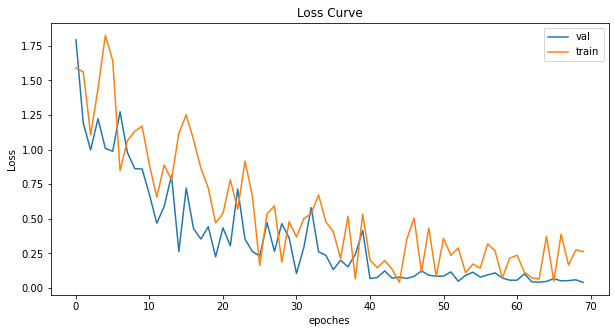

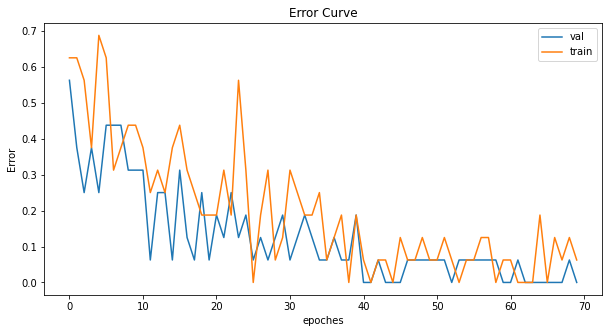

CNN(
  (features): Sequential(
    (0): ConvUnit(
      (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (1): ConvUnit(
      (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (2): ConvUnit(
      (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (3): Dropout(p=0.5, inplace=True)
    (4): ConvUnit(
      (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(192, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU()
    )
    (5): ConvUnit(
      (0): Conv2

In [ ]:
train(model=cnn_model, loss='ce', optimizer='adam', scheduler="steplr", epochs=70, device=device, dataset='cifar10', lossfn=None, train_loader=cifar10_train,
      val_loader=cifar10_val, weight_decay=0.0, lr=0.001, momentum=0, patience=10, step_size=40, gamma=0.1, min_delta=-1.0)

In [ ]:
_ = test(model=cnn_model, loss='ce', lossfn=None, optimizer='adam', device=device, dataset='cifar10', test_loader=cifar10_test, at_epoch=70)

Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
[70] test metrics:{"loss": 0.9241928458213806, "error": 0.375}
FINISHED TESTING


In [ ]:
from google.colab import files
files.download('./checkpoints/CNN_70.pth.tar') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##DNN & MNIST

In [ ]:
dnn = {"input_size": 1024, "hidden_size":64, "num_classes":10,"num_layer": 10, "activation": nn.ReLU()}
model = get_model("mlp", **dnn)
print(model.__class__.__name__)

MLP


In [ ]:
mnist_train, mnist_val, mnist_test = get_dataset("mnist", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)

Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32


Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.3617703318595886, "error": 0.125}
[0] test metrics:{"loss": 1.110242247581482, "error": 0.375}
Epoch number: 0 
Epoch Time: 4.76 sec
[1] train metrics:{"loss": 0.617748498916626, "error": 0.1875}
[1] test metrics:{"loss": 1.0066702365875244, "error": 0.4375}
Epoch number: 1 
Epoch Time: 4.65 sec
[2] train metrics:{"loss": 0.56736159324646, "error": 0.1875}
[2] test metrics:{"loss": 1.2338515520095825, "error": 0.375}
Epoch number: 2 
Epoch Time: 4.72 sec
[3] train metrics:{"loss": 0.2984260618686676, "error": 0.125}
[3] test metrics:{"loss": 0.7058019042015076, "error": 0.25}
Epoch number: 3 
Epoch Time: 4.68 sec
[4] train metrics:{"loss": 0.3477477431297302, "error": 0.0625}
[4] test metrics:{"loss": 0.8702590465545654, "error": 0.3125}
Epoch number: 4 
Epoch Time: 4.71 sec
[5] train metrics:{"loss": 0.3370427191257477, "error": 0.125}
[5] test metrics:{"loss": 0.98323237895965

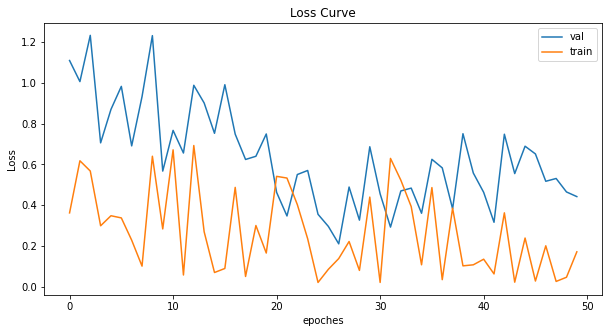

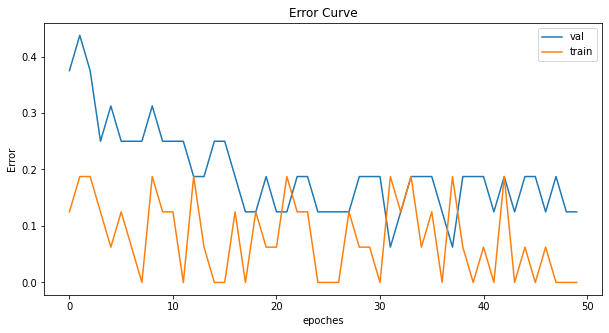

In [ ]:
saved = train(model=model, loss='ce', optimizer='adam', scheduler=True, epochs=50, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train,
      val_loader=mnist_val, weight_decay=0, lr=0.001, momentum=0., patience=5, step_size=70, gamma=0.1, min_delta=-0.6)

In [ ]:
_ = test(model=saved, loss='ce', optimizer='adam', device=device, lossfn=None, dataset='mnist', test_loader=mnist_test, at_epoch=None)

Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.027804553508758545
Error:  0.0
FINISHED TESTING


In [ ]:
from google.colab import files
files.download('./checkpoints/MLP_50.pth.tar')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##RESNET & CIFAR100

In [ ]:
fashion_train, fashion_val, fashion_test =get_dataset("fashion-mnist", batch_size=16, cuda=0,
                  train_size=10000, val_size=1000, test_size=500,
                  test_batch_size=10)

Dataset sizes: 	 train: 10000 	 val: 1000 	 test: 500
Batch size: 	 16


In [ ]:
cifar100_train, cifar100_val, cifar100_test = get_dataset("cifar100", batch_size=32, cuda=0,
                  train_size=20000, val_size=2000, test_size=1000,
                  test_batch_size=10)

  0%|          | 0/169001437 [00:00<?, ?it/s]

Extracting /root/data/cifar-100-python.tar.gz to /root/data
Dataset sizes: 	 train: 20000 	 val: 2000 	 test: 1000
Batch size: 	 32


In [ ]:
resnet18 = {"filters_percentage": 0.4, "n_channels":3,"num_classes": 100, "block": ResBlock, "num_blocks": [2,2,2,2]}
model = get_model("resnet18", **resnet18)
print(model.__class__.__name__)

ResNet18


Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in ResNet18_training]
[0] train metrics:{"loss": 4.240328788757324, "error": 0.9375}
[0] test metrics:{"loss": 3.9507384300231934, "error": 0.9375}
Epoch number: 0 
Epoch Time: 25.49 sec
[1] train metrics:{"loss": 3.8084049224853516, "error": 0.875}
[1] test metrics:{"loss": 3.59297776222229, "error": 0.875}
Epoch number: 1 
Epoch Time: 25.25 sec
[2] train metrics:{"loss": 3.468061923980713, "error": 0.8125}
[2] test metrics:{"loss": 3.632766008377075, "error": 0.875}
Epoch number: 2 
Epoch Time: 25.29 sec
[3] train metrics:{"loss": 3.371551036834717, "error": 0.84375}
[3] test metrics:{"loss": 3.223646879196167, "error": 0.75}
Epoch number: 3 
Epoch Time: 25.31 sec
[4] train metrics:{"loss": 3.5450258255004883, "error": 0.8125}
[4] test metrics:{"loss": 2.5872769355773926, "error": 0.6875}
Epoch number: 4 
Epoch Time: 25.09 sec
[5] train metrics:{"loss": 3.4898781776428223, "error": 0.90625}
[5] test metrics:{"loss": 2.234

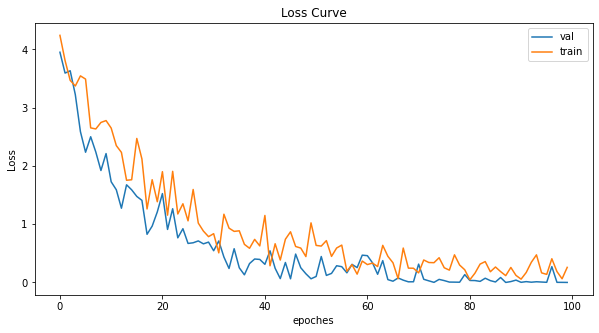

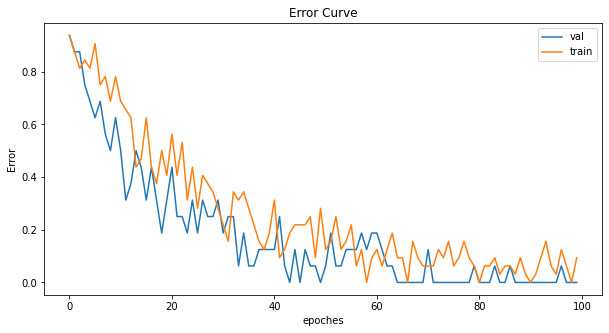

In [ ]:
_ = train(model=model, loss='ce', optimizer='adam', scheduler=None, epochs=100, device=device, dataset='cifar100', lossfn=None, train_loader=cifar100_train,
      val_loader=cifar100_val, weight_decay=0, lr=0.001, momentum=0., patience=5, step_size=130, gamma=0.1, min_delta=-0.6)

In [ ]:
_ =  test(model=model, loss='ce', optimizer='sgd', device=device, lossfn=None, dataset='cifar100', test_loader=cifar100_test, at_epoch=200)

Optimizer: 	  sgd

Loss function:
CrossEntropyLoss()
TESTING
[200] test metrics:{"loss": 3.2400870323181152, "error": 0.5}
FINISHED TESTING


ResNet18(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): ResBlock(
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(64, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (shortcut): Sequential(
        (0): Conv2d(64, 25, kernel_size=(1, 1), stride=(1, 1), bias=False)
      )
    )
    (1): ResBlock(
      (bn1): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv1): Conv2d(25, 25, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(25, eps=1e-05, momentum=0.1, affine=True, track_r

In [ ]:
! ls ./checkpoints/
from google.colab import files
files.download('./checkpoints/ResNet18_200.pth.tar')

ResNet18_200.pth.tar  ResNet18_70.pth.tar


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##LR & CSV

In [ ]:
fmnist_train, fmnist_val, fmnist_test = get_dataset("fashion-mnist", batch_size=32, cuda=0,
                  train_size=10000, val_size=2000, test_size=1000,
                  test_batch_size=32)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/train-images-idx3-ubyte.gz to /root/data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /root/data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /root/data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /root/data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /root/data/FashionMNIST/raw

Dataset sizes: 	 train: 10000 	 val: 2000 	 test: 1000
Batch size: 	 32


SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 1.7735402584075928, "error": 0.5625}
[0] test metrics:{"loss": 1.8153843879699707, "error": 0.4375}
Epoch number: 0 
Epoch Time: 2.03 sec
[1] train metrics:{"loss": 1.8150819540023804, "error": 0.5}
[1] test metrics:{"loss": 1.7607682943344116, "error": 0.4375}
Epoch number: 1 
Epoch Time: 2.1 sec
[2] train metrics:{"loss": 1.8499886989593506, "error": 0.6875}
[2] test metrics:{"loss": 1.7251193523406982, "error": 0.4375}
Epoch number: 2 
Epoch Time: 2.05 sec
[3] train metrics:{"loss": 1.6990571022033691, "error": 0.5}
[3] test metrics:{"loss": 1.701263189315796, "error": 0.4375}
Epoch number: 3 
Epoch Time: 2.21 sec
[4] train metrics:{"loss": 1.903696894645691, "error": 0.6875}
[4] test metrics:{"loss": 1.6833536624908447, "error": 0.375}
Epoch number: 4 
Epoch Time: 2.1 sec
[5] train metrics:{"loss": 1.8205429315567017, "error": 0.5625}
[5] test met

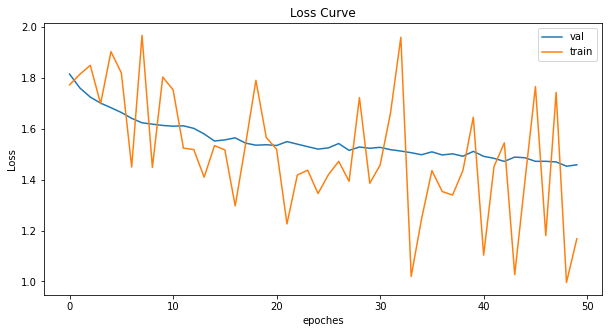

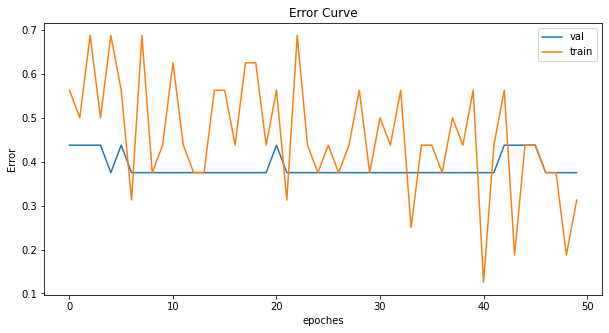

In [ ]:
regression = LinearRegression(input_size=1024, output_size=10)
reg = train(model=regression, loss='ce', optimizer='adam', scheduler=None, epochs=50, device=device, dataset='mnist', lossfn=None, train_loader=mnist_train, val_loader=mnist_val, weight_decay=0.0, lr=0.0001, momentum=0, min_delta=-1, name='LR')

In [ ]:
test(model=regression, loss='ce', optimizer='adam', device=device, lossfn=None, dataset='mnist', test_loader=mnist_test, at_epoch=None)

SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  1.2081784009933472
Error:  0.375
FINISHED TESTING


Optimizer: 	  adam

Loss function:
L1Loss()
[Logging in MLP_training]
[0] train metrics:{"loss": 0.5267432928085327, "error": 0.9333333298563957}
[0] test metrics:{"loss": 1.0848498344421387, "error": 0.9375}
Epoch number: 0 
Epoch Time: 0.62 sec
[1] train metrics:{"loss": 0.872506320476532, "error": 1.0}
[1] test metrics:{"loss": 1.0208959579467773, "error": 0.9375}
Epoch number: 1 
Epoch Time: 0.6 sec
[2] train metrics:{"loss": 0.782767117023468, "error": 0.8666666597127914}
[2] test metrics:{"loss": 0.7602530121803284, "error": 0.9375}
Epoch number: 2 
Epoch Time: 0.61 sec
[3] train metrics:{"loss": 0.5623997449874878, "error": 1.0}
[3] test metrics:{"loss": 0.7365806698799133, "error": 0.9375}
Epoch number: 3 
Epoch Time: 0.6 sec
[4] train metrics:{"loss": 0.35855603218078613, "error": 1.0}
[4] test metrics:{"loss": 0.7571700811386108, "error": 0.9375}
Epoch number: 4 
Epoch Time: 0.63 sec
[5] train metrics:{"loss": 0.5308729410171509, "error": 1.0}
[5] test metrics:{"loss": 0.7333

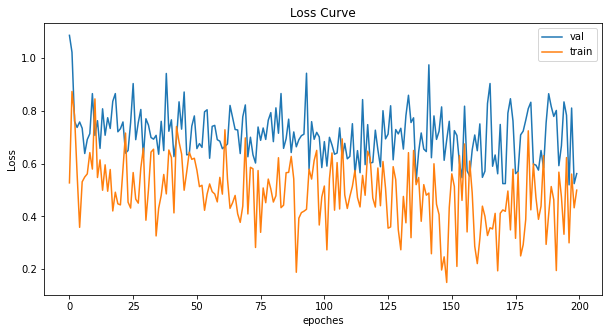

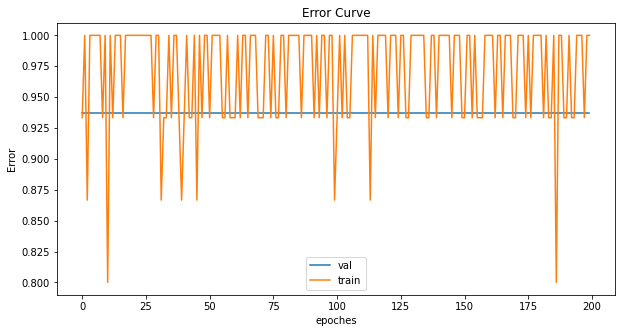

MLP(
  (activation): ReLU()
  (layers): Sequential(
    (0): Layer(in_features=11, out_features=64, bias=True, beta=0.31622776601683794)
    (1): ReLU()
    (2): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (3): ReLU()
    (4): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (5): ReLU()
    (6): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (7): ReLU()
    (8): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (9): ReLU()
    (10): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (11): ReLU()
    (12): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (13): ReLU()
    (14): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (15): ReLU()
    (16): Layer(in_features=64, out_features=64, bias=True, beta=0.31622776601683794)
    (17): ReLU()
    (18): Layer(in_features=64,

In [ ]:
traind, val, testd = get_dataset("csv", path='/content/drive/My Drive/project/URP/data/csv_datasets/winequality-red.csv')
regression = LinearRegression(input_size=11, output_size=1)
train(model=mlp, loss='mae', optimizer='adam', scheduler=None, epochs=200, device=device, dataset='mnist', lossfn=None, train_loader=traind, val_loader=testd, weight_decay=0.0, lr=0.001, momentum=0, min_delta=-1, name='csv')

SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
[Logging in LinearRegression_training]
[0] train metrics:{"loss": 1.5887892246246338, "error": 0.5}
[0] test metrics:{"loss": 1.417079210281372, "error": 0.5625}
Epoch number: 0 
Epoch Time: 2.57 sec
[1] train metrics:{"loss": 1.4357316493988037, "error": 0.4375}
[1] test metrics:{"loss": 1.3170969486236572, "error": 0.5625}
Epoch number: 1 
Epoch Time: 2.51 sec
[2] train metrics:{"loss": 1.0642045736312866, "error": 0.3125}
[2] test metrics:{"loss": 1.3416792154312134, "error": 0.625}
Epoch number: 2 
Epoch Time: 2.36 sec
[3] train metrics:{"loss": 1.291157603263855, "error": 0.5}
[3] test metrics:{"loss": 1.2857825756072998, "error": 0.5625}
Epoch number: 3 
Epoch Time: 2.39 sec
[4] train metrics:{"loss": 1.2559382915496826, "error": 0.4375}
[4] test metrics:{"loss": 1.3110023736953735, "error": 0.625}
Epoch number: 4 
Epoch Time: 2.4 sec
[5] train metrics:{"loss": 1.3255678415298462, "error": 0.625}
[5] test metr

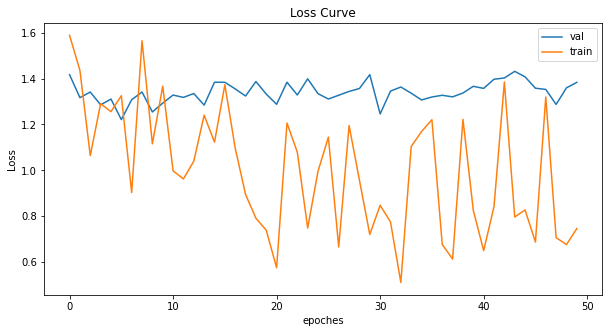

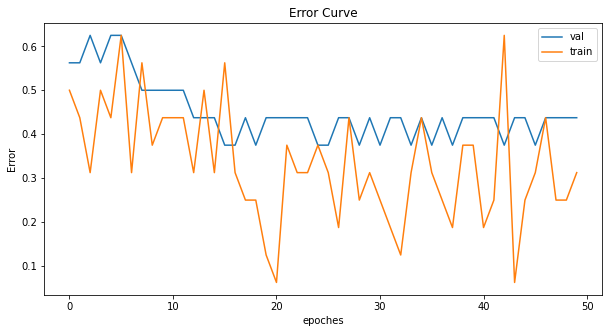

In [ ]:
regression = LinearRegression(input_size=1024, output_size=10)
reg = train(model=regression, loss='ce', optimizer='adam', scheduler=None, epochs=50, device=device, dataset='mnist', lossfn=None, train_loader=fmnist_train, val_loader=fmnist_val, weight_decay=0.0, lr=0.0001, momentum=0, min_delta=-1, name='LR_')

In [ ]:
test(model=regression, loss='ce', optimizer='adam', device=device, lossfn=None, dataset='mnist', test_loader=fmnist_test, at_epoch=None)

SEED SET TO:  13
Optimizer: 	  adam

Loss function:
CrossEntropyLoss()
TESTING
Loss:  0.8220194578170776
Error:  0.25
FINISHED TESTING


In [ ]:
traind, val, testd = get_dataset("csv", path='/content/drive/My Drive/project/URP/data/csv_datasets/Linear-Regression.csv')